In [1]:
# creating lists of paths to photos and encodings
import data_functions
input_list, enc_list = data_functions.list_of_paths('data/train')
# creating paris of phots and encodings (0 - photos in pairs is not the same, 1- photo and encoding are the same picture)
data = data_functions.create_list_of_pairs_and_labels(input_list, enc_list, 1)

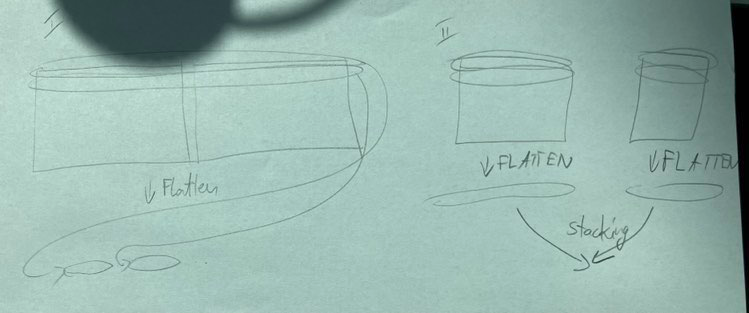

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
files, labels = data
n_elements = len(files)
labels_n = labels[:n_elements]
images = data_functions.load_images_scikit(files, gray_scale=True, n_elements=n_elements)

#X_train, X_test, y_train, y_test = train_test_split(images, labels_n)

100%|██████████| 20000/20000 [12:37<00:00, 26.41it/s]


## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Number of trees in random forest
n_estimators = [x for x in range(100, 1001, 100)]
# Maximum number of levels in tree
max_depth = [x for x in range(10,111,11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
parameters = {'n_estimators': [1000],
               'max_depth': [120]}
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap}

forest = RandomForestClassifier()

clf = GridSearchCV(estimator=forest, param_grid=parameters, scoring='accuracy', verbose=4, n_jobs=-1)

clf.fit(images, labels_n)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [21]:
clf.best_params_

{'max_depth': 109, 'n_estimators': 1000}